In [1]:
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<ipython-input-1-5b905e6ca903>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [15]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import itertools
import statsmodels.api as sm

In [2]:
data = pd.read_csv('INCIDENT MANAGEMENT.csv')

In [4]:
data.columns

Index(['Unnamed: 0', 'number', 'incident_state', 'active',
       'reassignment_count', 'reopen_count', 'sys_mod_count', 'made_sla',
       'caller_id', 'opened_by', 'opened_at', 'sys_created_by',
       'sys_created_at', 'sys_updated_by', 'sys_updated_at', 'contact_type',
       'location', 'category', 'subcategory', 'u_symptom', 'impact', 'urgency',
       'priority', 'assignment_group', 'assigned_to', 'knowledge',
       'u_priority_confirmation', 'notify', 'closed_code', 'resolved_by',
       'resolved_at', 'closed_at', 'ticket_life', 'sys_created + temp_mean',
       'new2'],
      dtype='object')

In [8]:
data['opened_at'].isnull().sum()

0

In [9]:
incfrq = data.loc[:,['number','opened_at']]

In [13]:
incfrq.tail()

,number,opened_at
73657,INC0029231,2016-05-13 11:46:00.000000
73658,INC0029231,2016-05-13 11:46:00.000000
73659,INC0029232,2016-05-13 11:48:00.000000
73660,INC0029232,2016-05-13 11:48:00.000000
73661,INC0029233,2016-05-13 11:49:00.000000


In [12]:
incfrq.shape   

(73662, 2)

In [25]:
# Coverting all the values in proper Datetime format
for i in range(len(incfrq.opened_at)): 
        incfrq.opened_at[i] = dt.datetime.strptime(incfrq.opened_at[i],'%Y-%m-%d %H:%M:%S.%f').date()

In [26]:
incfrq.head()

,number,opened_at
0,INC0000045,2016-02-29
1,INC0000045,2016-02-29
2,INC0000045,2016-02-29
3,INC0000045,2016-02-29
4,INC0000047,2016-02-29


In [31]:
incfrq.dtypes

number       object
opened_at    object
dtype: object

In [37]:
incfrq['opened_at']=pd.to_datetime(incfrq['opened_at'])

In [38]:
incfrq.head()

,number,opened_at
0,INC0000045,2016-02-29
1,INC0000045,2016-02-29
2,INC0000045,2016-02-29
3,INC0000045,2016-02-29
4,INC0000047,2016-02-29


In [39]:
incfrq.columns

Index(['number', 'opened_at'], dtype='object')

In [42]:
incfrq.dtypes

number               object
opened_at    datetime64[ns]
dtype: object

In [43]:
# Adding a new column which will have the number of tickets per day
incfrq['No_Incidents'] = incfrq.groupby('opened_at')['number'].transform('count')

In [44]:
incfrq.drop(['number'],axis=1,inplace=True)
incfrq.drop_duplicates(inplace=True)

In [45]:
incfrq.head()

,opened_at,No_Incidents
0,2016-02-29,1314
1314,2016-01-03,2198
3512,2016-02-03,3152
6664,2016-03-03,2763
9427,2016-04-03,751


In [46]:
incfrq = incfrq.set_index('opened_at')

In [47]:
incfrq.index

DatetimeIndex(['2016-02-29', '2016-01-03', '2016-02-03', '2016-03-03',
               '2016-04-03', '2016-05-03', '2016-07-03', '2016-08-03',
               '2016-09-03', '2016-10-03', '2016-11-03', '2016-12-03',
               '2016-03-13', '2016-03-14', '2016-03-15', '2016-03-16',
               '2016-03-17', '2016-03-18', '2016-03-19', '2016-03-20',
               '2016-03-21', '2016-03-22', '2016-03-23', '2016-03-24',
               '2016-03-25', '2016-03-26', '2016-03-27', '2016-03-28',
               '2016-03-29', '2016-03-30', '2016-03-31', '2016-01-04',
               '2016-02-04', '2016-03-04', '2016-04-04', '2016-05-04',
               '2016-06-04', '2016-07-04', '2016-08-04', '2016-11-04',
               '2016-12-04', '2016-04-13', '2016-04-14', '2016-04-15',
               '2016-04-16', '2016-04-17', '2016-04-18', '2016-04-19',
               '2016-04-20', '2016-04-21', '2016-04-22', '2016-04-23',
               '2016-04-24', '2016-04-25', '2016-04-26', '2016-04-27',
      

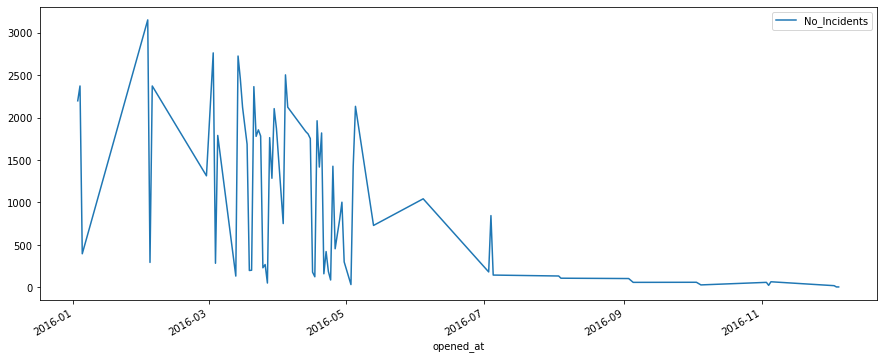

In [48]:
# Plotting number of tickets per day
incfrq.plot(figsize=(15,6))
plt.show()

In [55]:
# Checking range of dates for our values
print(incfrq.index.min(),'to',incfrq.index.max())

2016-01-03 00:00:00 to 2016-12-05 00:00:00


In [73]:
incfrom2013_new = incfrq[incfrq.index < dt.datetime(2016,8,1)]

In [74]:
incfrom2013_new['No_Incidents']

opened_at
2016-02-29    1314
2016-01-03    2198
2016-02-03    3152
2016-03-03    2763
2016-04-03     751
2016-05-03      32
2016-07-03     181
2016-03-13     132
2016-03-14    2726
2016-03-15    2459
2016-03-16    2121
2016-03-17    1902
2016-03-18    1687
2016-03-19     198
2016-03-20     201
2016-03-21    2365
2016-03-22    1779
2016-03-23    1856
2016-03-24    1783
2016-03-25     230
2016-03-26     268
2016-03-27      50
2016-03-28    1764
2016-03-29    1285
2016-03-30    2106
2016-03-31    1871
2016-01-04    2373
2016-02-04     293
2016-03-04     283
2016-04-04    2504
2016-05-04    1427
2016-06-04    1043
2016-07-04     845
2016-04-13    1835
2016-04-14    1808
2016-04-15    1753
2016-04-16     178
2016-04-17     124
2016-04-18    1963
2016-04-19    1417
2016-04-20    1819
2016-04-21     159
2016-04-22     421
2016-04-23     187
2016-04-24      86
2016-04-25    1427
2016-04-26     454
2016-04-27     628
2016-04-28     798
2016-04-29    1003
2016-04-30     299
2016-01-05     395
20

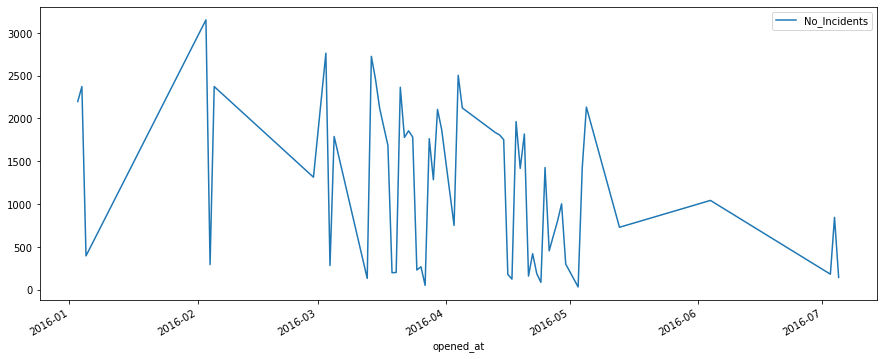

In [75]:
incfrom2013_new.plot(figsize=(15,6))
plt.show()

In [76]:
from statsmodels.tsa.seasonal import seasonal_decompose

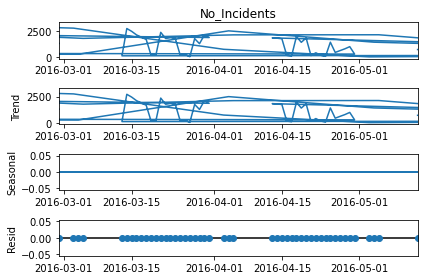

In [83]:
results = seasonal_decompose(x=incfrom2013_new['No_Incidents'], model='additive', extrapolate_trend='freq', period=1)
results.plot();

In [54]:
for columns in incfrq.columns:
    if incfrq[columns].dtype==datatime64:
        print(str(columns) + '-' + str(incfrq[columns].unique()))
        print(incfrq[columns].value_counts())

NameError: name 'datatime64' is not defined

In [84]:
data.head()

,Unnamed: 0,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,...,knowledge,u_priority_confirmation,notify,closed_code,resolved_by,resolved_at,closed_at,ticket_life,sys_created + temp_mean,new2
0,0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,...,True,False,Do Not Notify,code 5,Resolved by 149,29/2/2016 11:29,2016-05-03 12:00:00.000000,5568240.0,2016-02-29 01:25:52.656747,2016-03-05 06:50:59.468315
1,1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,...,True,False,Do Not Notify,code 5,Resolved by 149,29/2/2016 11:29,2016-05-03 12:00:00.000000,5568240.0,2016-02-29 01:25:52.656747,2016-03-05 06:50:59.468315
2,2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,...,True,False,Do Not Notify,code 5,Resolved by 149,29/2/2016 11:29,2016-05-03 12:00:00.000000,5568240.0,2016-02-29 01:25:52.656747,2016-03-05 06:50:59.468315
3,3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,...,True,False,Do Not Notify,code 5,Resolved by 149,29/2/2016 11:29,2016-05-03 12:00:00.000000,5568240.0,2016-02-29 01:25:52.656747,2016-03-05 06:50:59.468315
4,4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,...,True,False,Do Not Notify,code 5,Resolved by 81,1/3/2016 09:52,2016-06-03 10:00:00.000000,8227200.0,2016-02-29 04:49:52.656747,2016-03-05 10:14:59.468315


In [102]:
data['opened_at'].unique()

array(['2016-02-29 01:16:00.000000', '2016-02-29 04:40:00.000000',
       '2016-02-29 06:10:00.000000', ..., '2016-05-13 11:46:00.000000',
       '2016-05-13 11:48:00.000000', '2016-05-13 11:49:00.000000'],
      dtype=object)

In [103]:
data['opened_at'].value_counts()

2016-04-14 20:42:00.000000    58
2016-03-30 09:20:00.000000    51
2016-03-30 08:20:00.000000    46
2016-04-19 08:20:00.000000    45
2016-07-03 11:58:00.000000    44
                              ..
2016-03-04 07:40:00.000000     2
2016-03-25 14:35:00.000000     2
2016-03-18 15:10:00.000000     2
2016-05-05 16:27:00.000000     2
2016-05-13 11:49:00.000000     1
Name: opened_at, Length: 10584, dtype: int64

In [105]:
a = data.loc[:,['opened_at','closed_at']]

In [106]:
a.head()

,opened_at,closed_at
0,2016-02-29 01:16:00.000000,2016-05-03 12:00:00.000000
1,2016-02-29 01:16:00.000000,2016-05-03 12:00:00.000000
2,2016-02-29 01:16:00.000000,2016-05-03 12:00:00.000000
3,2016-02-29 01:16:00.000000,2016-05-03 12:00:00.000000
4,2016-02-29 04:40:00.000000,2016-06-03 10:00:00.000000


In [107]:
# Coverting all the values in proper Datetime format
for i in range(len(a.opened_at)): 
        a.opened_at[i] = dt.datetime.strptime(a.opened_at[i],'%Y-%m-%d %H:%M:%S.%f').date()

In [108]:
# Coverting all the values in proper Datetime format
for i in range(len(a.closed_at)): 
        a.closed_at[i] = dt.datetime.strptime(a.closed_at[i],'%Y-%m-%d %H:%M:%S.%f').date()

In [134]:
a.head(10)

,opened_at,closed_at,diff_days
0,2016-02-29,2016-05-03,64.0
1,2016-02-29,2016-05-03,64.0
2,2016-02-29,2016-05-03,64.0
3,2016-02-29,2016-05-03,64.0
4,2016-02-29,2016-06-03,95.0
5,2016-02-29,2016-06-03,95.0
6,2016-02-29,2016-06-03,95.0
7,2016-02-29,2016-06-03,95.0
8,2016-02-29,2016-06-03,95.0
9,2016-02-29,2016-06-03,95.0


In [126]:
for i in range(len(a.opened_at)):
    a['diff_days'] = a['closed_at'] - a['opened_at']  
    a['diff_days']=a['diff_days']/np.timedelta64(1,'D')      

datetime.timedelta(0)

In [135]:
a['diff_days'].mean()

80.37294670250604